<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/05_ml_07_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Linear Regression.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/praktikum_datasets/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


## Chilonzor tumanidagi uylar narxini bashorat qilib ko'ramiz

In [2]:
housing = df[df['district'] == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [3]:
X = housing['size']
X.head()

2    42.0
3    65.0
4    70.0
5    28.0
6    30.0
Name: size, dtype: float64

In [4]:
y = housing['price']
y.head()

2    37000.0
3    49500.0
4    55000.0
5    25500.0
6    21200.0
Name: price, dtype: float64

#1-vazifa

In [5]:
# Yuqoridagi X va y o'zgaruvchilardan quyidagi formuladan foydalangan holda θ(0) va 𝜃(1) koeffisientlarni hisoblash
x_mean = X.mean()
y_mean = y.mean()

tilda_1 = ((X - x_mean) * (y - y_mean)).sum() / ((X - x_mean) ** 2).sum()
tilda_0 = y_mean - tilda_1 * x_mean

print(f'tilda_0 = {tilda_0}')
print(f'tilda_1 = {tilda_1}')

tilda_0 = -195.94911352666531
tilda_1 = 740.0264822713249


## 2-vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [11]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(x_test)
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(y_test)

[54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
[37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [12]:
y_pred = tilda_0 + tilda_1 * x_test
y_pred

array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])

In [ ]:
X_random = np.random.choice(X, size=10, replace=False)
X_random

array([50., 34., 48., 62., 66., 62., 57., 30., 36., 45.])

In [ ]:
for x in X_random:
  y_pred = tilda_0 + tilda_1 * x
  print(f'x = {x}, y_pred = {y_pred}')

x = 50.0, y_pred = 36805.37500003958
x = 34.0, y_pred = 24964.95128369838
x = 48.0, y_pred = 35325.32203549693
x = 62.0, y_pred = 45685.69278729548
x = 66.0, y_pred = 48645.79871638078
x = 62.0, y_pred = 45685.69278729548
x = 57.0, y_pred = 41985.560375938854
x = 30.0, y_pred = 22004.84535461308
x = 36.0, y_pred = 26445.00424824103
x = 45.0, y_pred = 33105.24258868295


## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [14]:
# MAE (mean absolute error)
mae = np.sum(np.absolute(y_pred - y_test)) / len(y_test)
print(f'MAE = {mae}')


MAE = 4140.3503163471805


In [15]:

# # RMSE (root mean square error)
rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(y_test))

print(f'RMSE = {rmse}')

RMSE = 5882.051673173725


In [16]:
housing.shape

(1616, 6)

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

##Linear Regression ML

In [29]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = train_set['size'].to_numpy()
y_train = train_set['price'].to_numpy()

#Model train
LR_model.fit(x_train.reshape(-1, 1), y_train)

#theta0 va theta1 koeffitsiyentlarini ajratib olamiz
theta1 = LR_model.coef_[0]   # Accessing the first element of the coefficients array
theta0 = LR_model.intercept_  # Directly accessing the intercept since it is a scalar
print(f'theta0 = {theta0}')
print(f'theta1 = {theta1}')

theta0 = 106.31843170110369
theta1 = 732.7784051414766


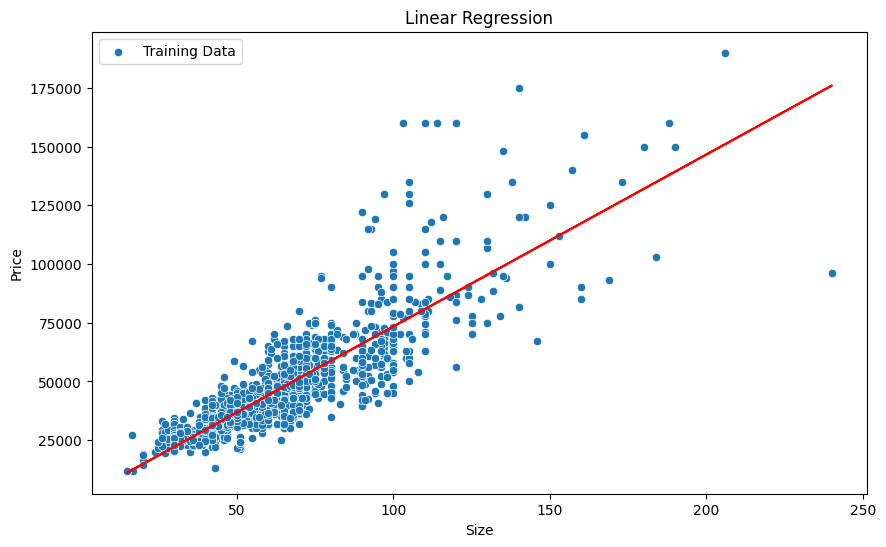

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing, x='size', y='price', label='Training Data')
plt.plot(x_train, theta1*x_train+theta0, '-r')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

##Modelni baholaymiz

In [31]:
x_test = test_set['size'].to_numpy()
y_test = test_set['price'].to_numpy()

In [32]:
y_pred = LR_model.predict(x_test.reshape(-1, 1))

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

MAE = 7269.709648262382
RMSE = 12734.803748258666
